In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data-preprocessing

#### Exploratory Data Analysis
- Analyzing distributions of all variables
- Examining relationships between variables
- Identifying any remaining data quality issues

In [2]:
df = pd.read_csv('Telco_Customer_Churn_Cleaned_Merged.csv')

In [3]:
df.drop(['country', 'state', 'lat_long', 'latitude', 'lat_long', 'longitude', 'customer_status', 'churn_value', 'churn_score', 'cltv', 
         'churn_category', 'churn_reason'], axis = 1, inplace= True)

In [4]:
df['population'].isnull().sum()

0

In [5]:
df.columns

Index(['customer_id', 'gender', 'age', 'under_30', 'senior_citizen', 'married',
       'dependents', 'number_of_dependents', 'city', 'zip_code', 'population',
       'referred_a_friend', 'number_of_referrals', 'tenure_in_months', 'offer',
       'phone_service', 'avg_monthly_long_distance_charges', 'multiple_lines',
       'internet_service', 'internet_type', 'avg_monthly_gb_download',
       'online_security', 'online_backup', 'device_protection_plan',
       'premium_tech_support', 'streaming_tv', 'streaming_movies',
       'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charge', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'satisfaction_score', 'churn_label'],
      dtype='object')

In [6]:
df.describe()

,age,under_30,senior_citizen,married,dependents,number_of_dependents,zip_code,population,referred_a_friend,number_of_referrals,...,unlimited_data,paperless_billing,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,satisfaction_score,churn_label
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.198921,0.162147,0.483033,0.231010,0.468692,93486.070567,22139.603294,0.457476,1.951867,...,0.673719,0.592219,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370
std,16.750352,0.399217,0.368612,0.499748,0.421508,0.962802,1856.767505,21152.392837,0.498224,3.001199,...,0.468885,0.491457,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90001.000000,11.000000,0.000000,0.000000,...,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92101.000000,2344.000000,0.000000,0.000000,...,0.000000,0.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000
50%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93518.000000,17554.000000,0.000000,0.000000,...,1.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000
75%,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000,95329.000000,36125.000000,1.000000,3.000000,...,1.000000,1.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,9.000000,96150.000000,105285.000000,1.000000,11.000000,...,1.000000,1.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000


In [15]:
numerical_variables = ['age', 'number_of_dependents', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_long_distance_charges',
                        'avg_monthly_gb_download', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 
                        'total_revenue']
print(len(numerical_variables))
df[numerical_variables].describe()

11


,age,number_of_dependents,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,22.958954,20.515405,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,3.001199,24.542061,15.448113,20.418940,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,0.000000,9.000000,9.210000,3.000000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,0.000000,29.000000,22.890000,17.000000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


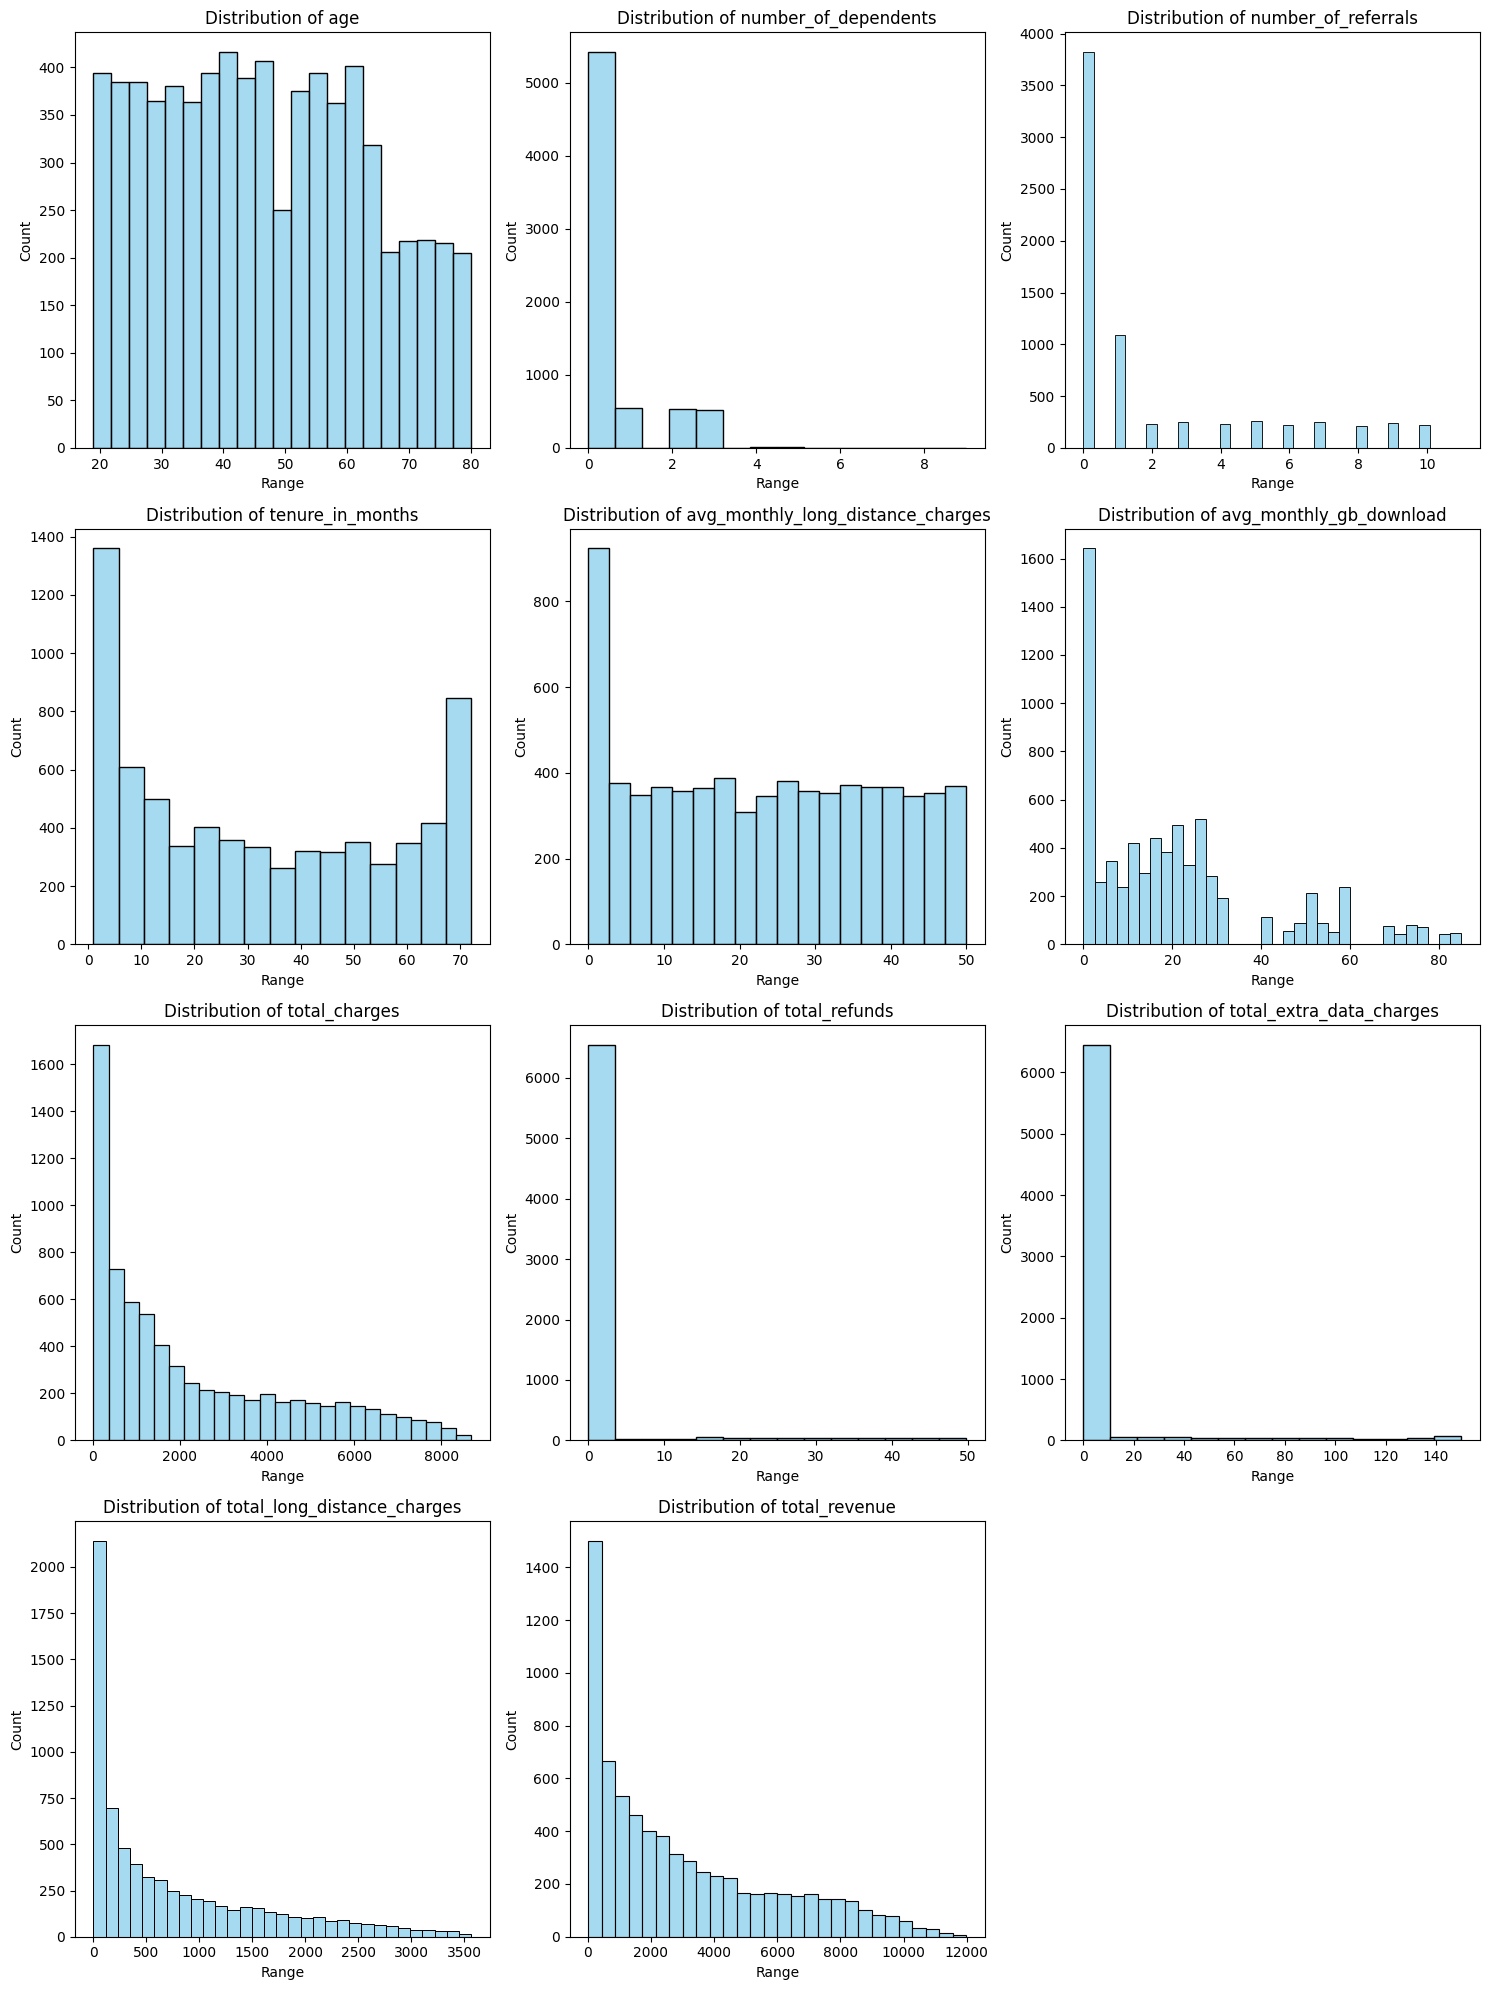

In [8]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

axes = axes.flatten()

for i, feature in enumerate(numerical_variables):
    sns.histplot(data=df, x=feature, ax=axes[i], color='skyblue', stat='count')
    axes[i].set_xlabel('Range')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {feature}')
    
if len(numerical_variables) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

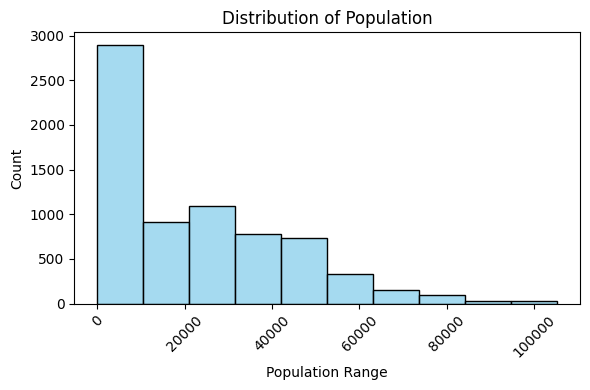

In [9]:
num_bins = 10
df['population_binned'] = pd.cut(df['population'], bins=num_bins)

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='population', bins=num_bins, color='skyblue', stat='count')

plt.xlabel('Population Range')
plt.ylabel('Count')
plt.title('Distribution of Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
categorical_variables = ['gender', 'under_30', 'under_30', 'married', 'dependents', 'referred_a_friend', 'offer', 'phone_service',
                         'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection_plan',
                         'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music',	'unlimited_data', 'contract',
                         'paperless_billing', 'payment_method', 'satisfaction_score', 'churn_label']
len(categorical_variables)

23

KeyError: <Axes: >

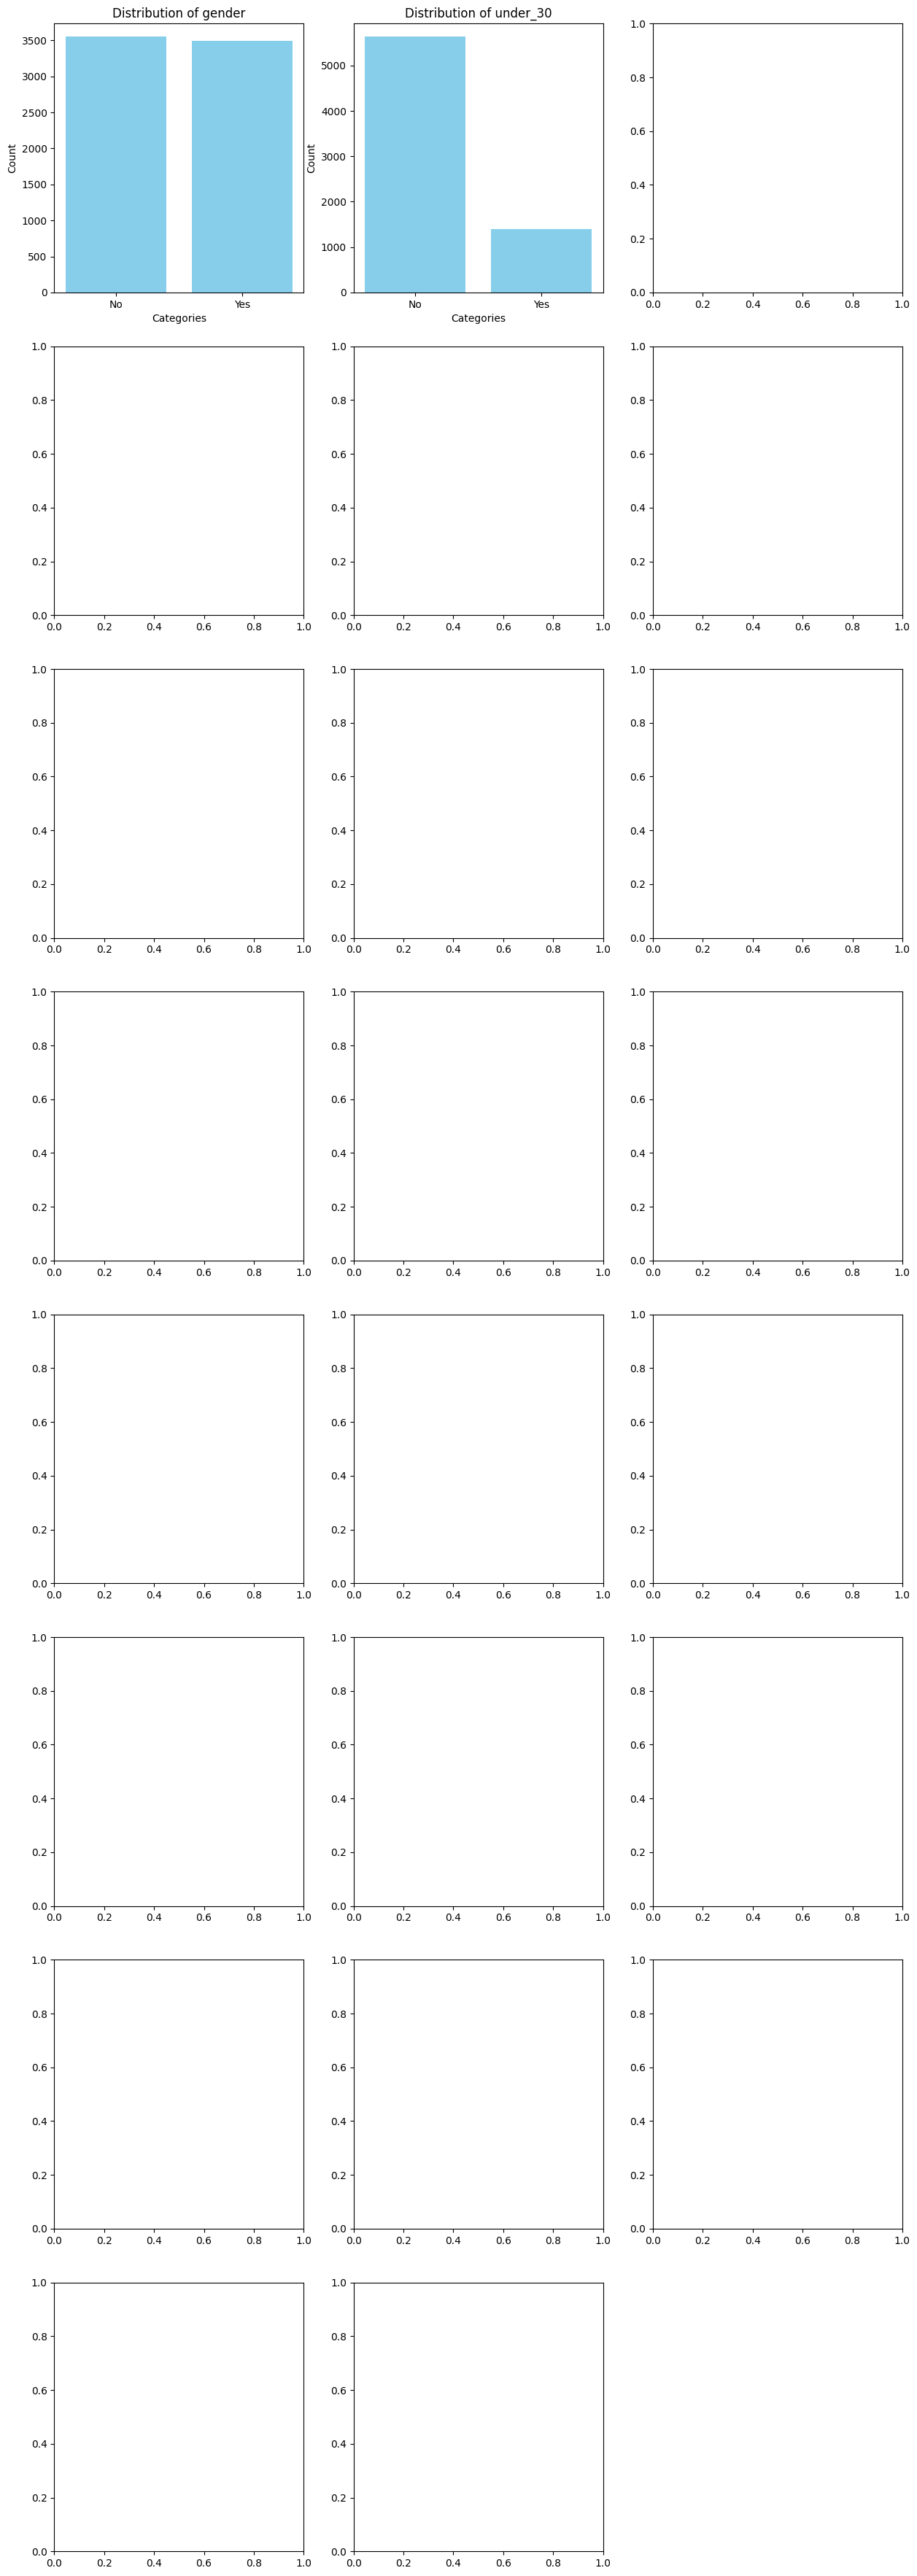

In [17]:
fig, axes = plt.subplots(8, 3, figsize=(15, 45))
axes = axes.flatten()  

for i, feature in enumerate(categorical_variables):
    category_counts = df[feature].value_counts()
    
    axes[i].bar(category_counts.index, category_counts.values, color='skyblue')
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Distribution of {feature}')
    if df[feature].nunique() == 2:
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['No', 'Yes'])
    else:
        axes[i].tick_params(axis='x', rotation=45)
    
    if len(categorical_variables) % 2 != 0:
        fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [ ]:
# TO check correlation
num_variables = []

#### Feature Selection

- Using correlation analysis, statistical tests, and mutual information to identify potential confounders and important covariates
- Domain knowledge to refine the selection
- Considering creating interaction terms or new features

#### Define Treatment and Outcome

- Treatment variable (a specific intervention or customer characteristic)
- Confirm 'churn_label' or 'churn_value' as outcome variable

#### Split the Data

- Dividing dataset into training and testing sets
- Ensuring both sets are representative of the overall data

#### Propensity Score Estimation

- Using logistic regression to estimate propensity scores
- Including all relevant covariates and potential confounders in the model
- Evaluating the model's performance using appropriate metrics

#### Matching

- Implementing a matching algorithm (nearest neighbor, caliper matching)
- Match treated units to control units based on propensity scores
- Determine the appropriate matching ratio (1:1, 1:n, or variable ratio)

#### Balance Assessment

- Checking covariate balance between matched groups
- Using standardized mean differences and statistical tests
- Visualizing balance using plots (love plots)

#### Treatment Effect Estimation

- Calculating the Average Treatment Effect on the Treated (ATT)
- Using appropriate statistical methods (regression adjustment on matched data)
- Considering doubly robust estimation methods

#### Sensitivity Analysis

- Performing Rosenbaum bounds analysis
- Conducting E-value calculations
- Testing different matching algorithms and parameters

#### Subgroup Analysis

- Investigating heterogeneous treatment effects across customer segments
- Using methods like causal trees or causal forests

#### Model Validation

- Implementing cross-validation techniques
- Assessing model performance on the test set

#### Additional points
- Make a model and then refine it again and again to get the best output